In [2]:
import pandas as pd
import math
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('data.txt', sep=' ', header=None)
print(data)

    0   1   2   3   4   5
0  80  60  75  73  81  66
1  70  84  88  90  65  60
2  60  40  55  58  47  49
3  60  65  60  70  68  72
4  60  35  40  20  56  57
5  95  98  85  87  93  95
6  55  70  53  64  74  77
7  50  53  57  63  58  40
8  62  64  53  58  40  45


In [8]:
centroid = [0, 0, 0, 0, 0, 0]
n_data = len(data)

for index, item in data.iterrows():
    for i in range(len(centroid)):
        centroid[i] += item[i]

for i in range(len(centroid)):
    centroid[i] /= n_data
    
print(centroid)


[65.77777777777777, 63.22222222222222, 62.888888888888886, 64.77777777777777, 64.66666666666667, 62.333333333333336]


In [9]:
def calculate_distance(a, b):
    total = 0
    for i in range(len(a)):
        total += math.pow(a[i]-b[i], 2)
    return math.sqrt(total)

In [10]:
distances = []

for index, item in data.iterrows():
    distances.append(calculate_distance(centroid, item))

print(distances)

[26.592489425158387, 41.49490523538796, 34.21572809955556, 13.293458894611138, 58.84201488774311, 70.11454473014889, 23.721636734903342, 30.569491771380395, 32.67252404024663]


In [11]:
distance_avg = 0
distance_count = len(distances)

for i in range(distance_count):
    distance_avg += distances[i]
    
distance_avg /= distance_count

print(distance_avg)

36.83519931323727


outliers :
    0   1   2   3   4   5
5  95  98  85  87  93  95


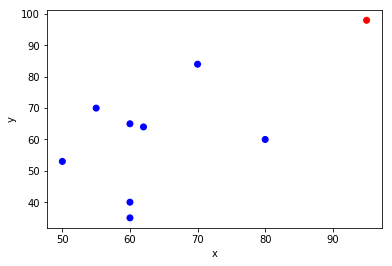

In [14]:
distance_tresshold = distance_avg * 1.6
# outlier = 1 not-outlier = 0
outliers = []
outliers_index = []
plot_colors = []


for i in range(distance_count):
    if distances[i] > distance_tresshold:
        outliers.append(1)
        plot_colors.append('r')
        outliers_index.append(i)
    else:
        outliers.append(0)
        plot_colors.append('b')

print('outliers :')
print(data.take(outliers_index))

plt.scatter(data[0], data[1], c=plot_colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()